In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('rock_density_xray.csv')

In [78]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [79]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

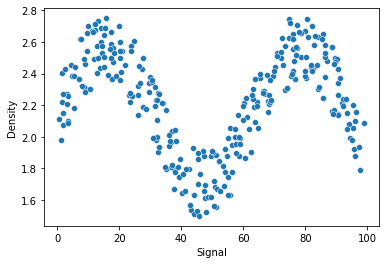

In [80]:
sns.scatterplot(x = 'Signal',y = 'Density',data =df)

In [81]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state =101)

## Linear Model

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr_model = LinearRegression()

In [86]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [87]:
lr_preds = lr_model.predict(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [89]:
MAE = mean_absolute_error(y_test,lr_preds)

In [90]:
MSE = np.sqrt(mean_squared_error(y_test,lr_preds))

In [91]:
np.mean(df['Density'])

2.2250629493237963

In [92]:
print(MSE,MAE)

0.2570051996584629 0.211198973318633


In [93]:
signal_range = np.arange(0,100)

In [94]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

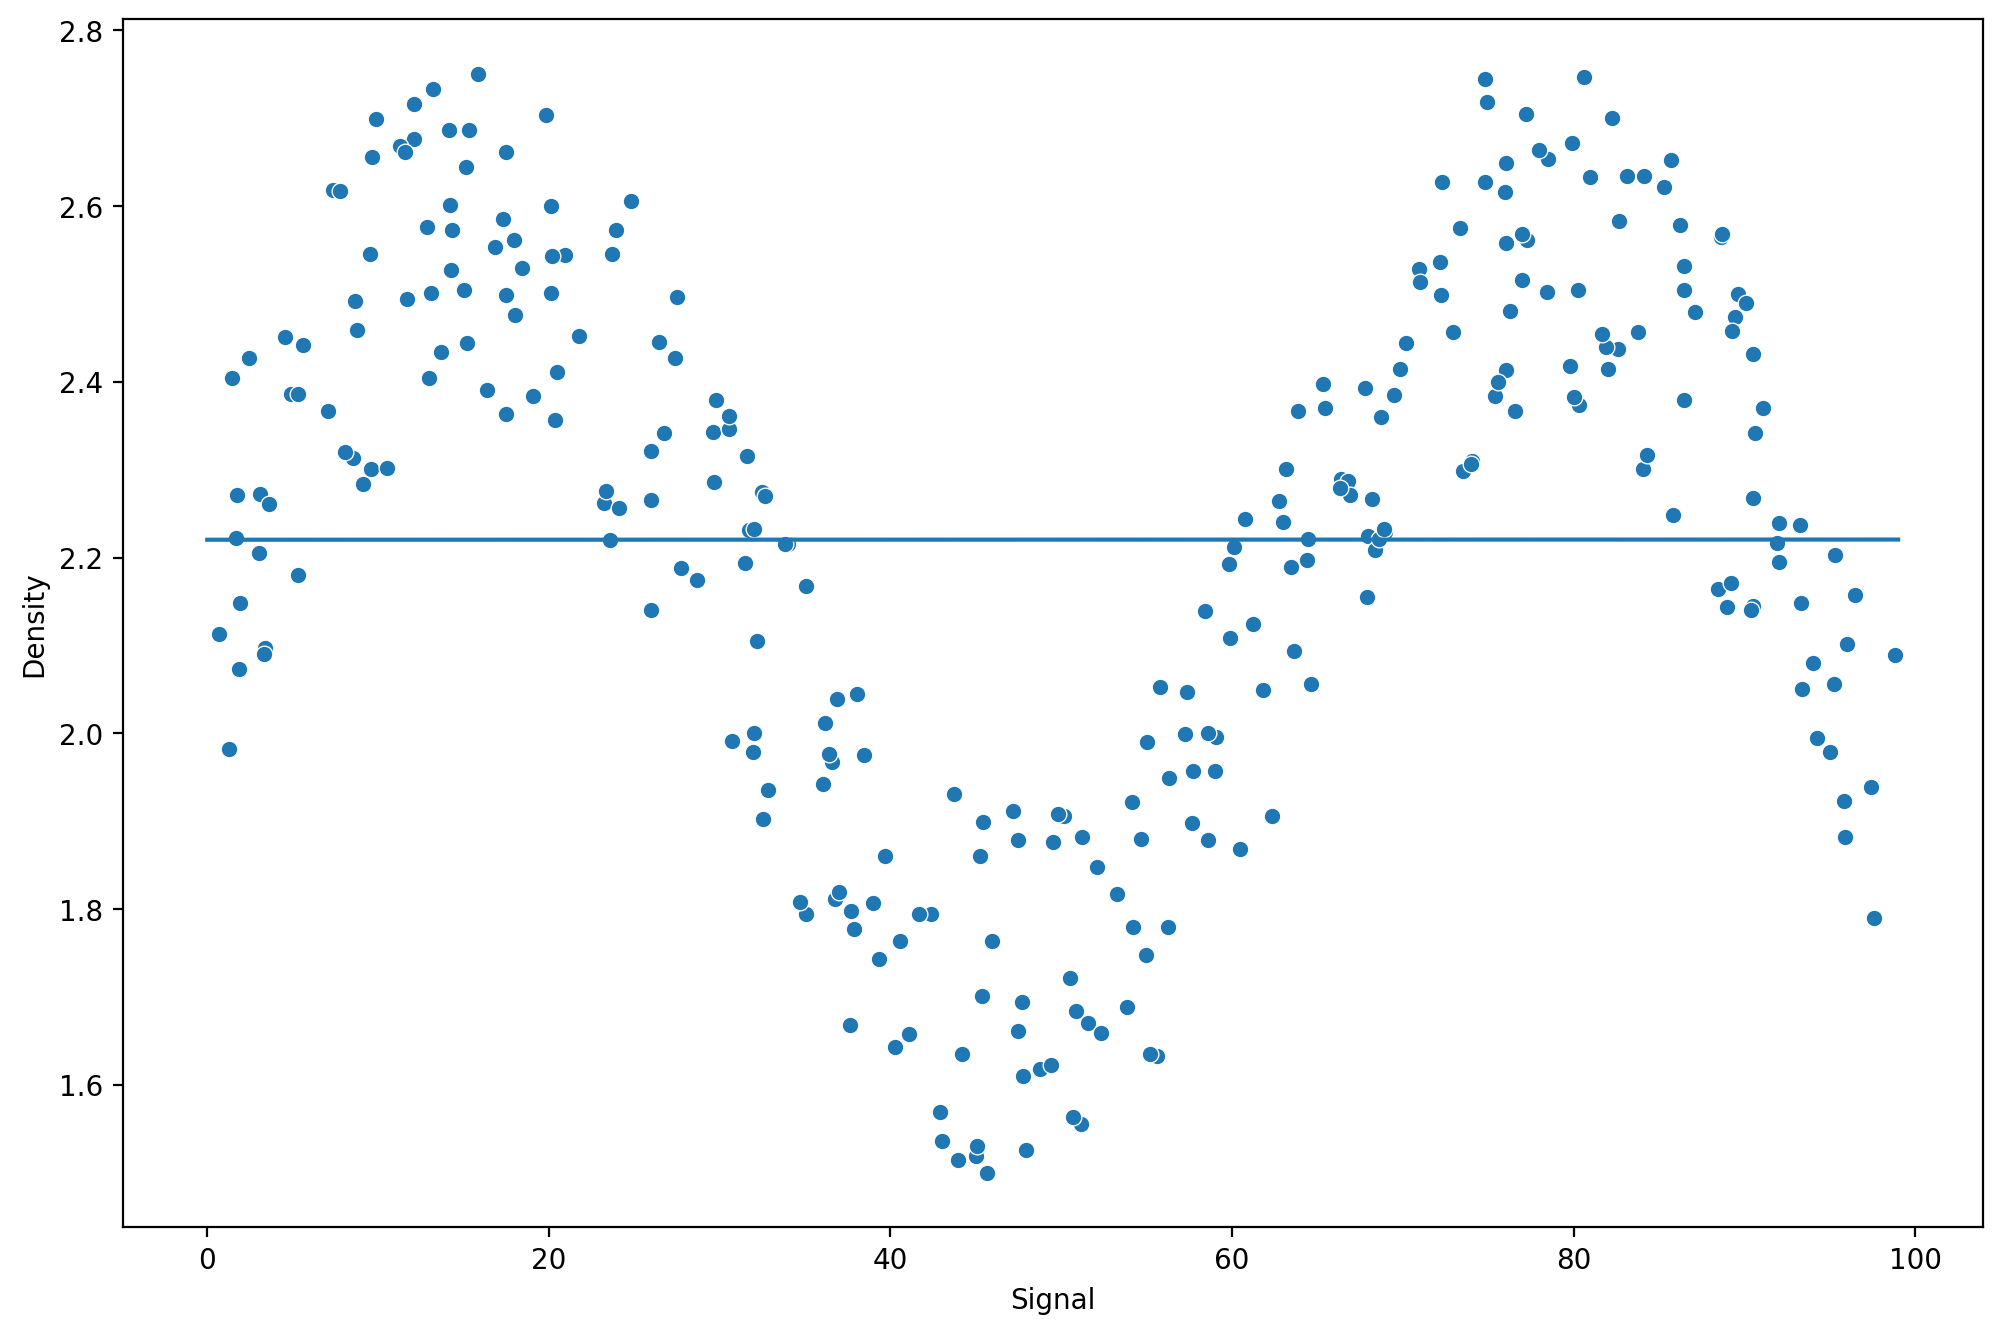

In [95]:
plt.figure(figsize = (12,8),dpi = 200)
sns.scatterplot(x = 'Signal',y = 'Density',data = df)
plt.plot(signal_range,signal_preds)

## Polynomial Regression

In [96]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    ## Fit model training
    model.fit(X_train,y_train)
    ## Get Metrics
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae  = mean_absolute_error(y_test,preds)
    print(f"MAE : {mae}")
    print(f"MSE : {rmse}")

    ## plot results model signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize = (12,8),dpi = 200)
    sns.scatterplot(x = 'Signal',y = 'Density',data = df,color = 'black')
    plt.plot(signal_range,signal_preds)
    

In [97]:
#model = LinearRegression()
#run_model(model,X_train,y_train,X_test,y_test)

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [99]:
pipe = make_pipeline(PolynomialFeatures(degree =6),LinearRegression())

MAE : 0.11969122389484065
MSE : 0.1380744906136982


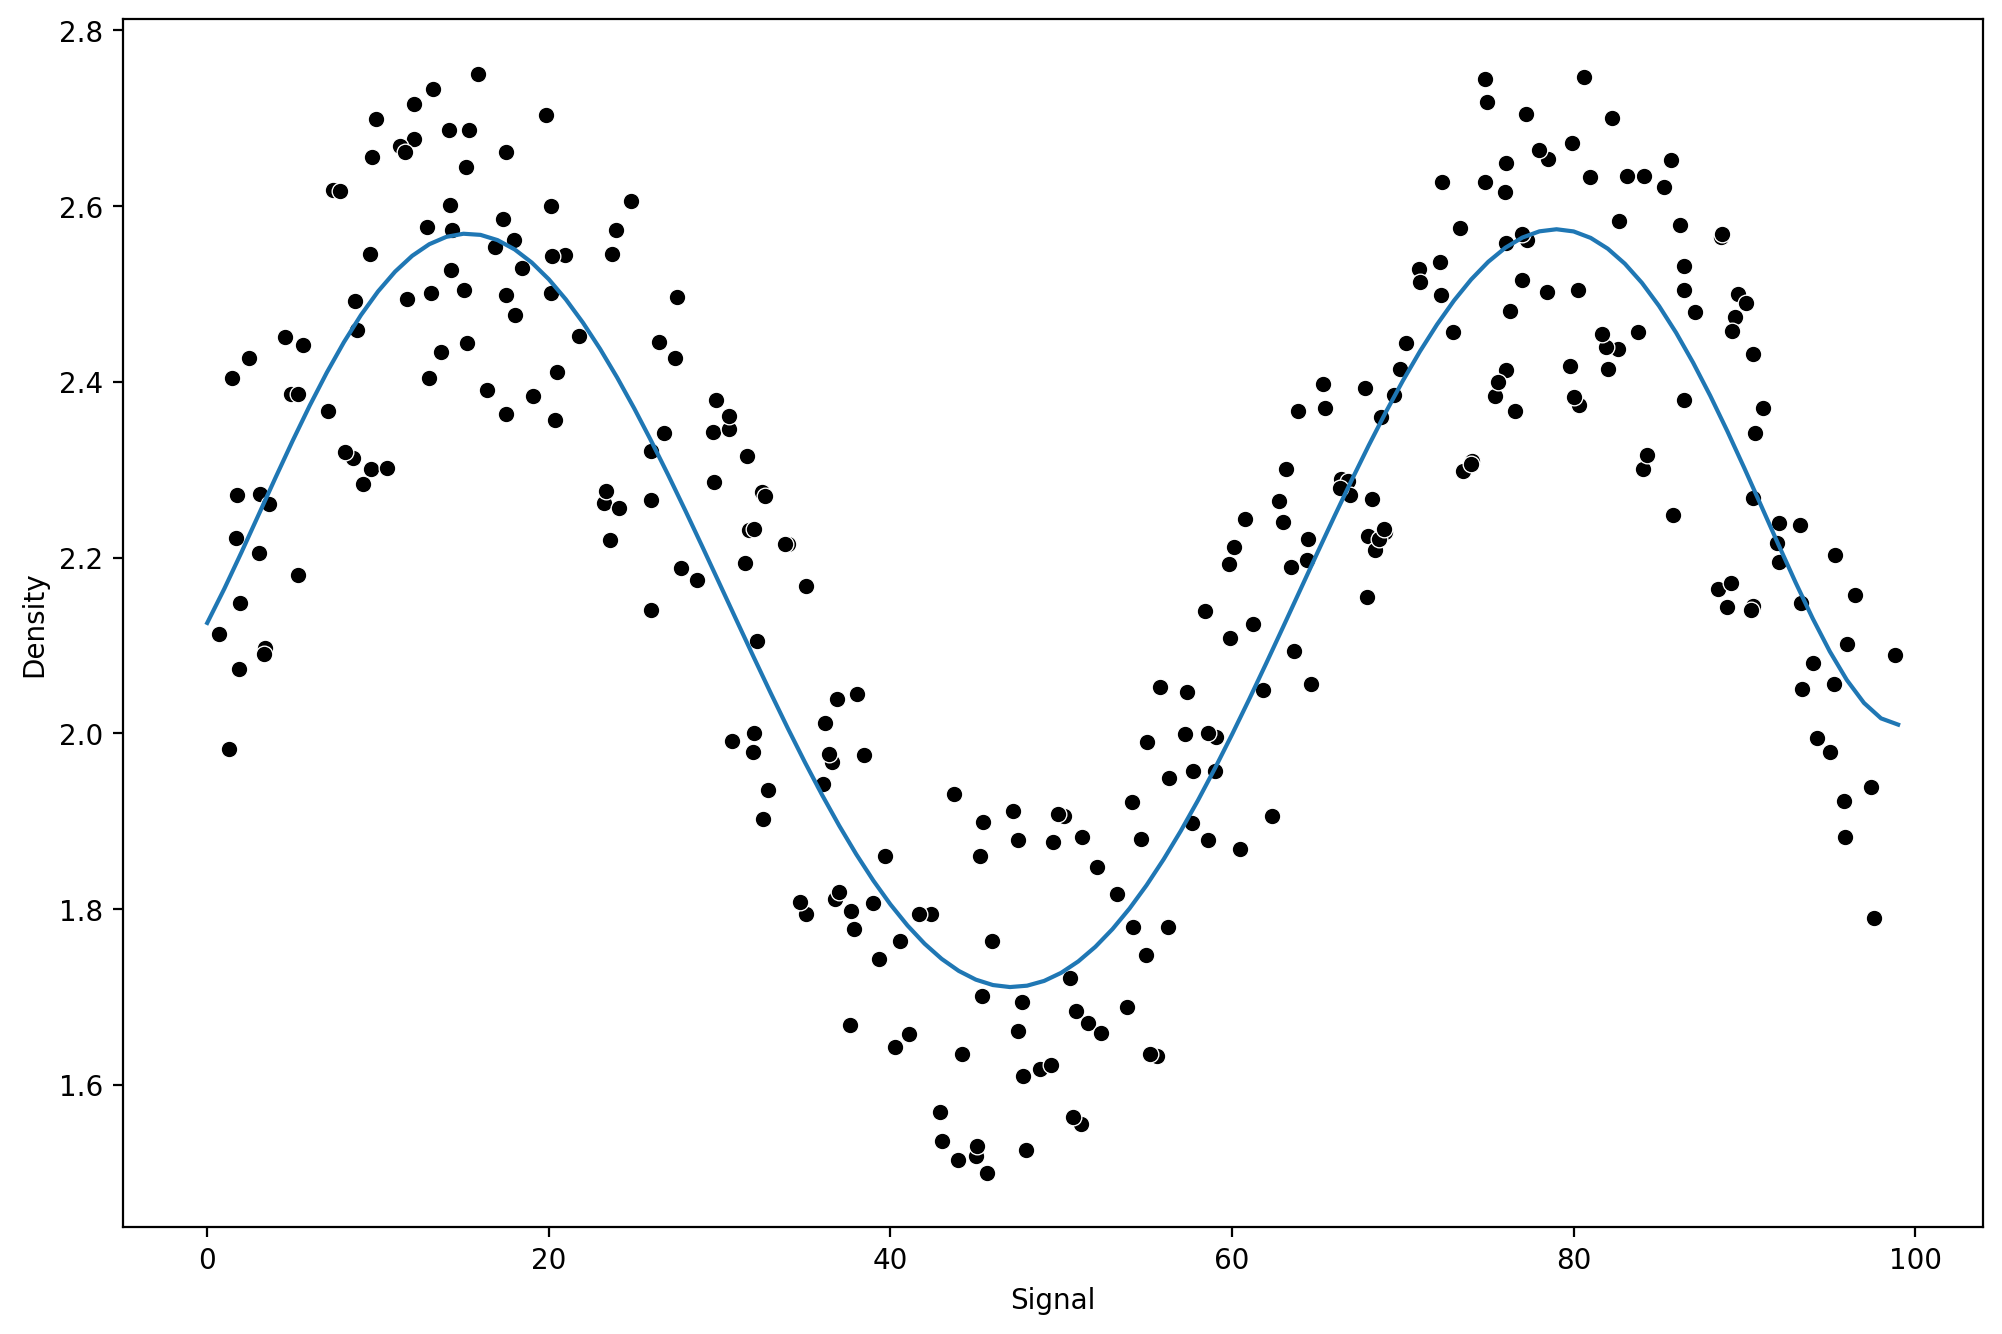

In [100]:
run_model(pipe,X_train,y_train,X_test,y_test)

## K-NN Regressor

In [101]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
MSE : 0.1523487028635337
MAE : 0.12198383614100558
MSE : 0.13730685016923647
MAE : 0.11635971693292672
MSE : 0.13277855732740926


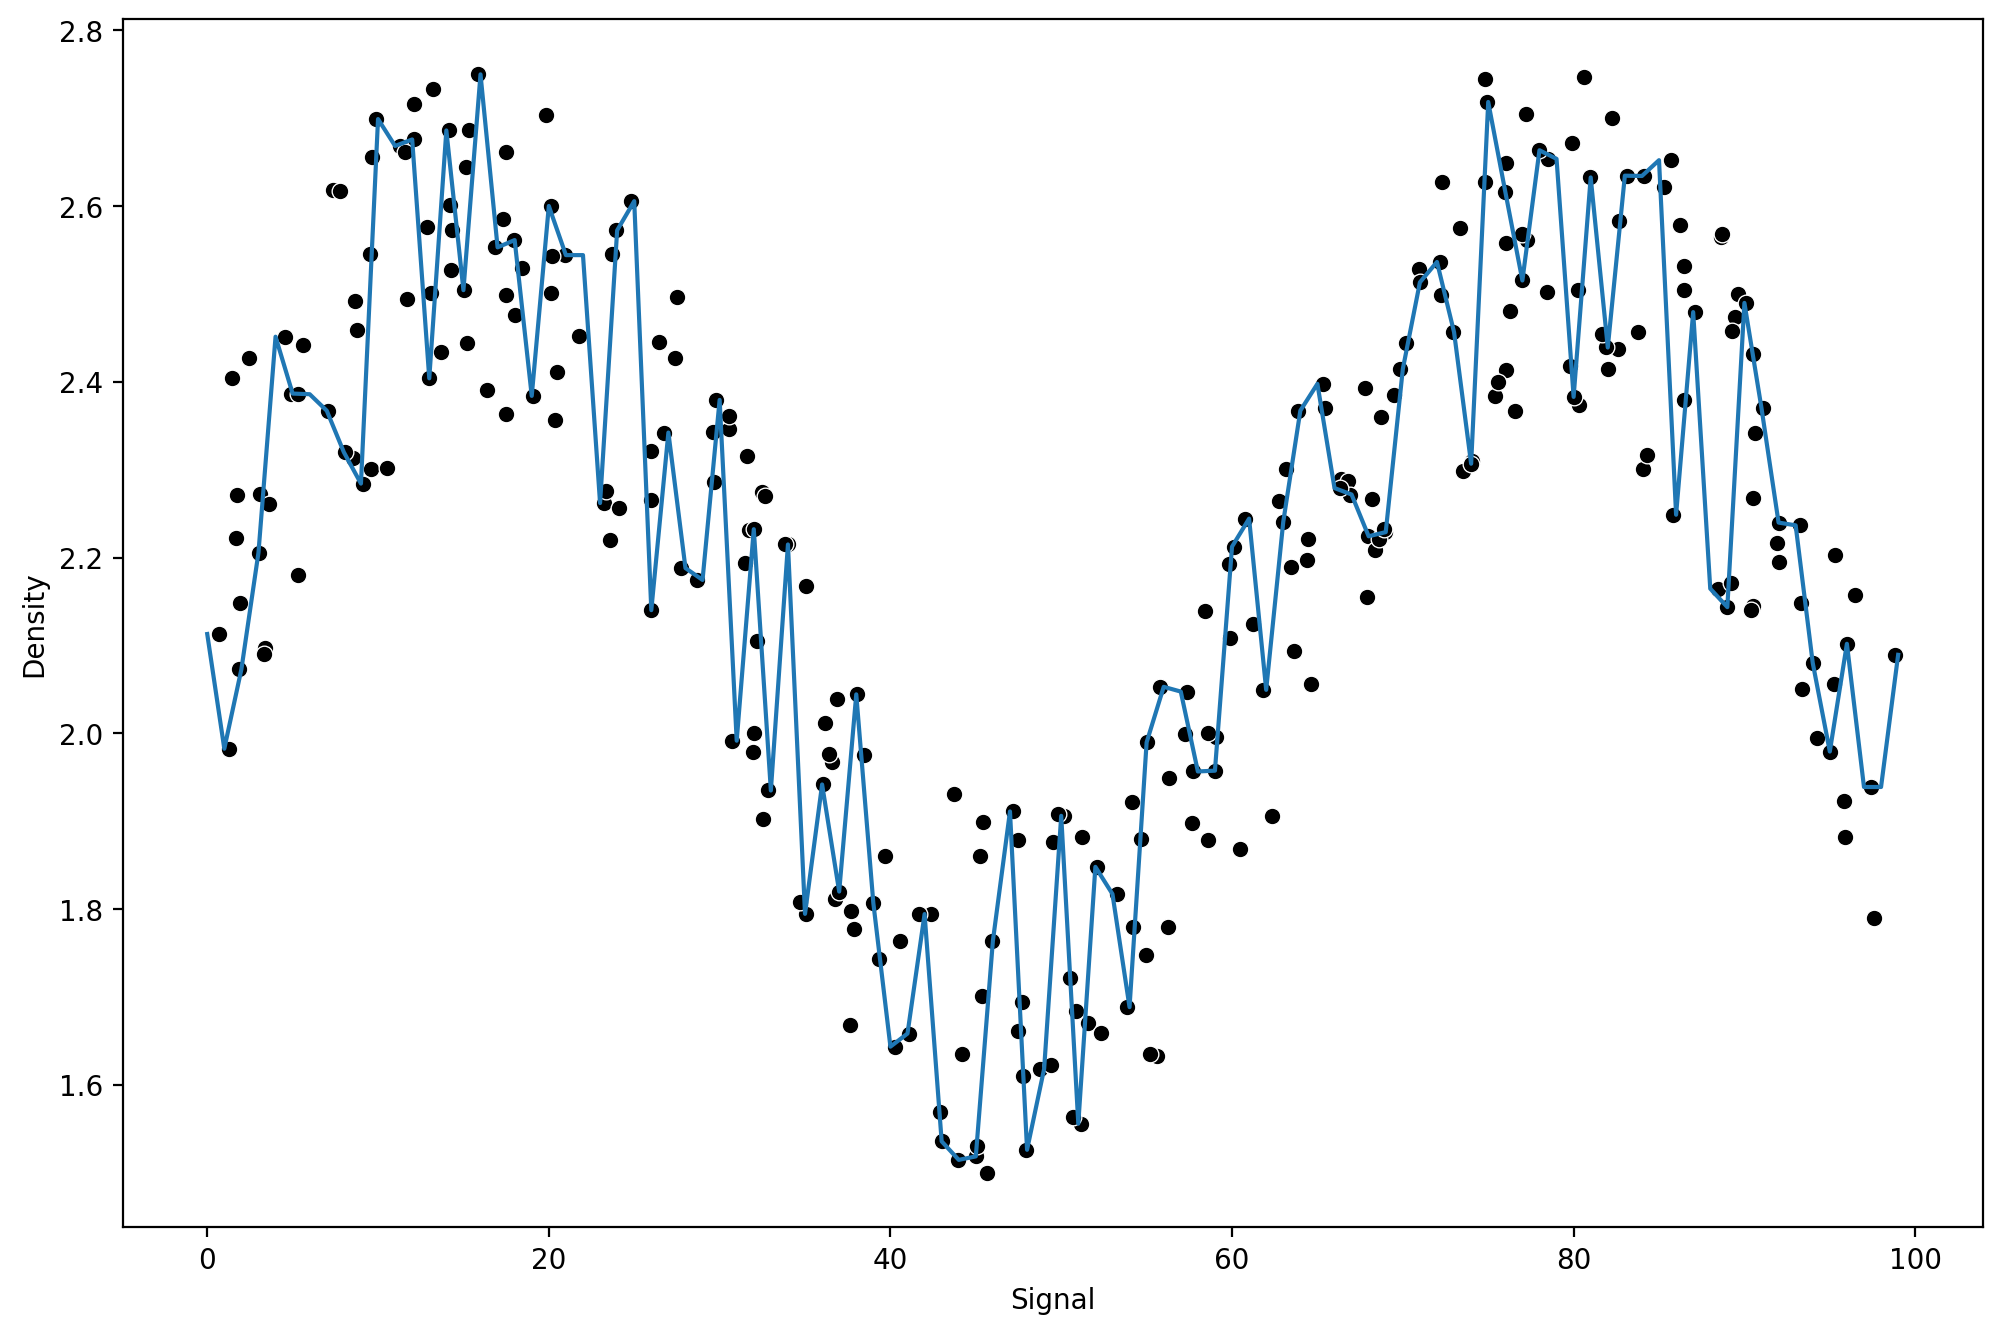

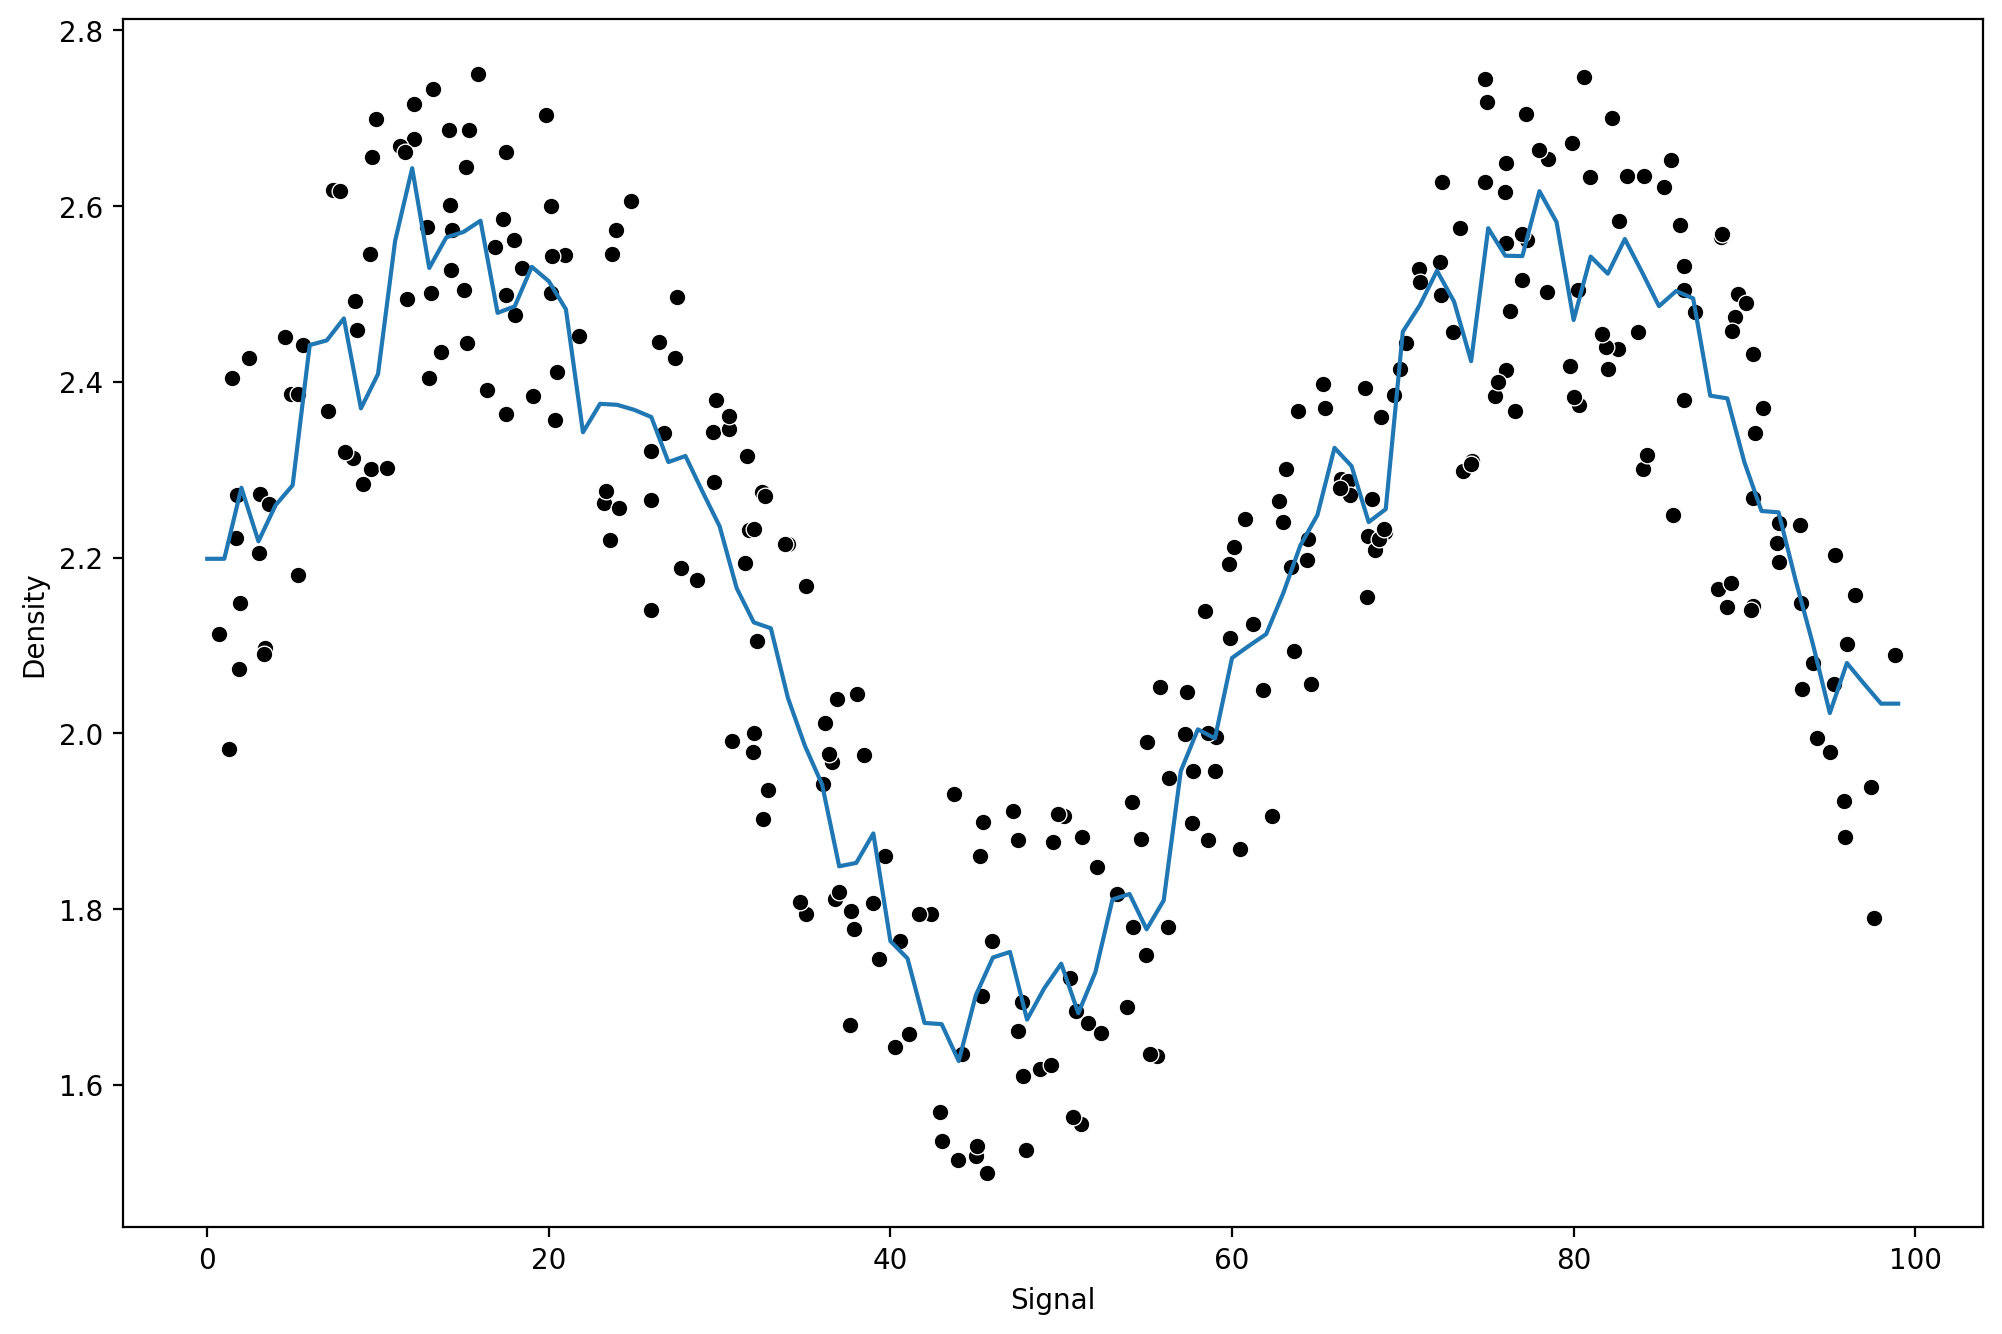

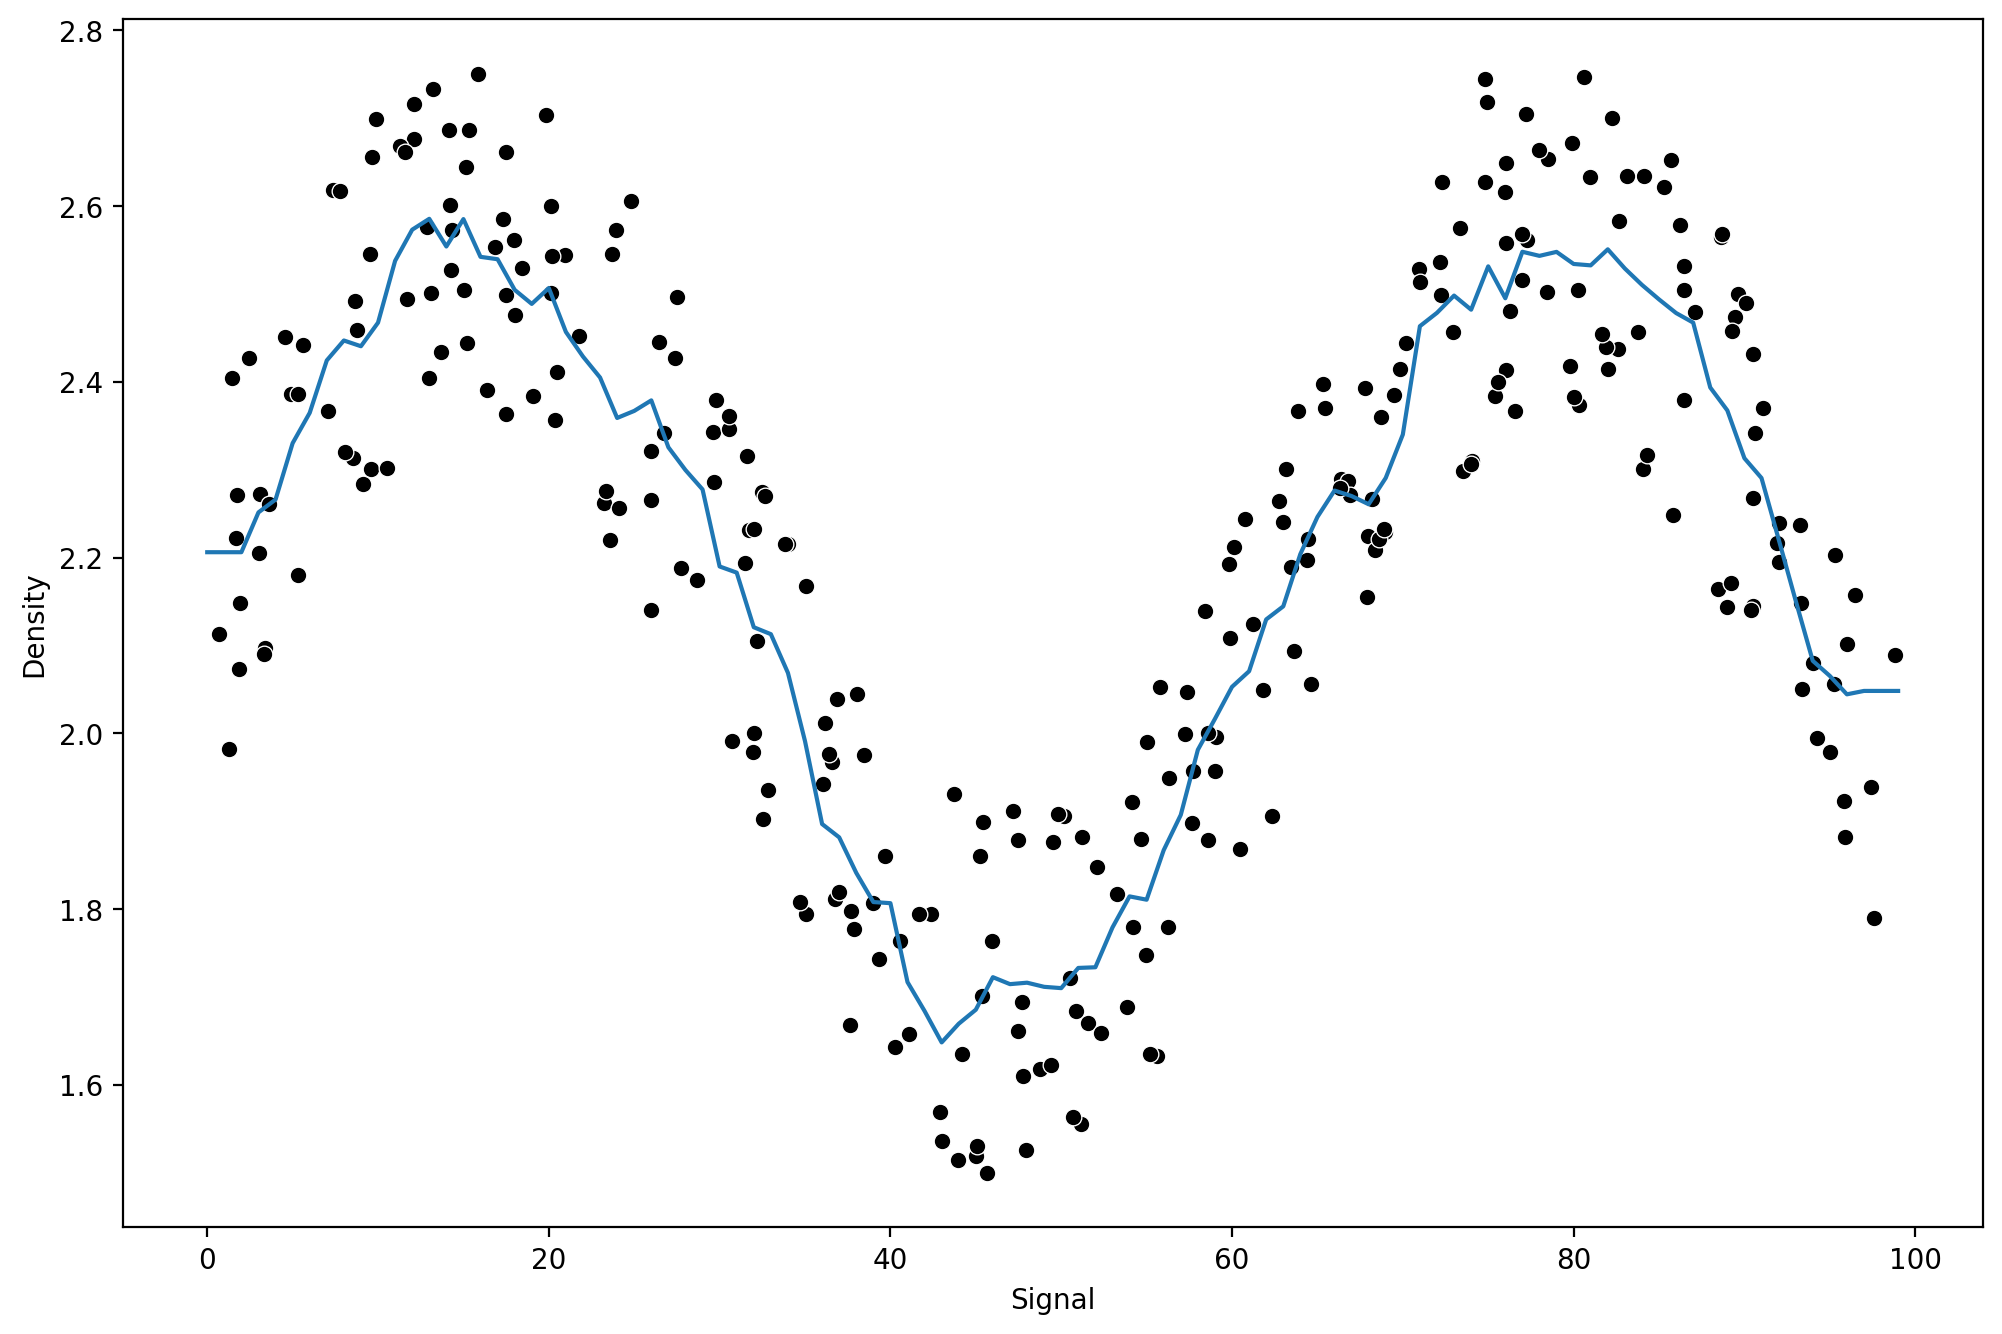

In [102]:
k_values = [1,5,10]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## DecisionTree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
MSE : 0.1523487028635337


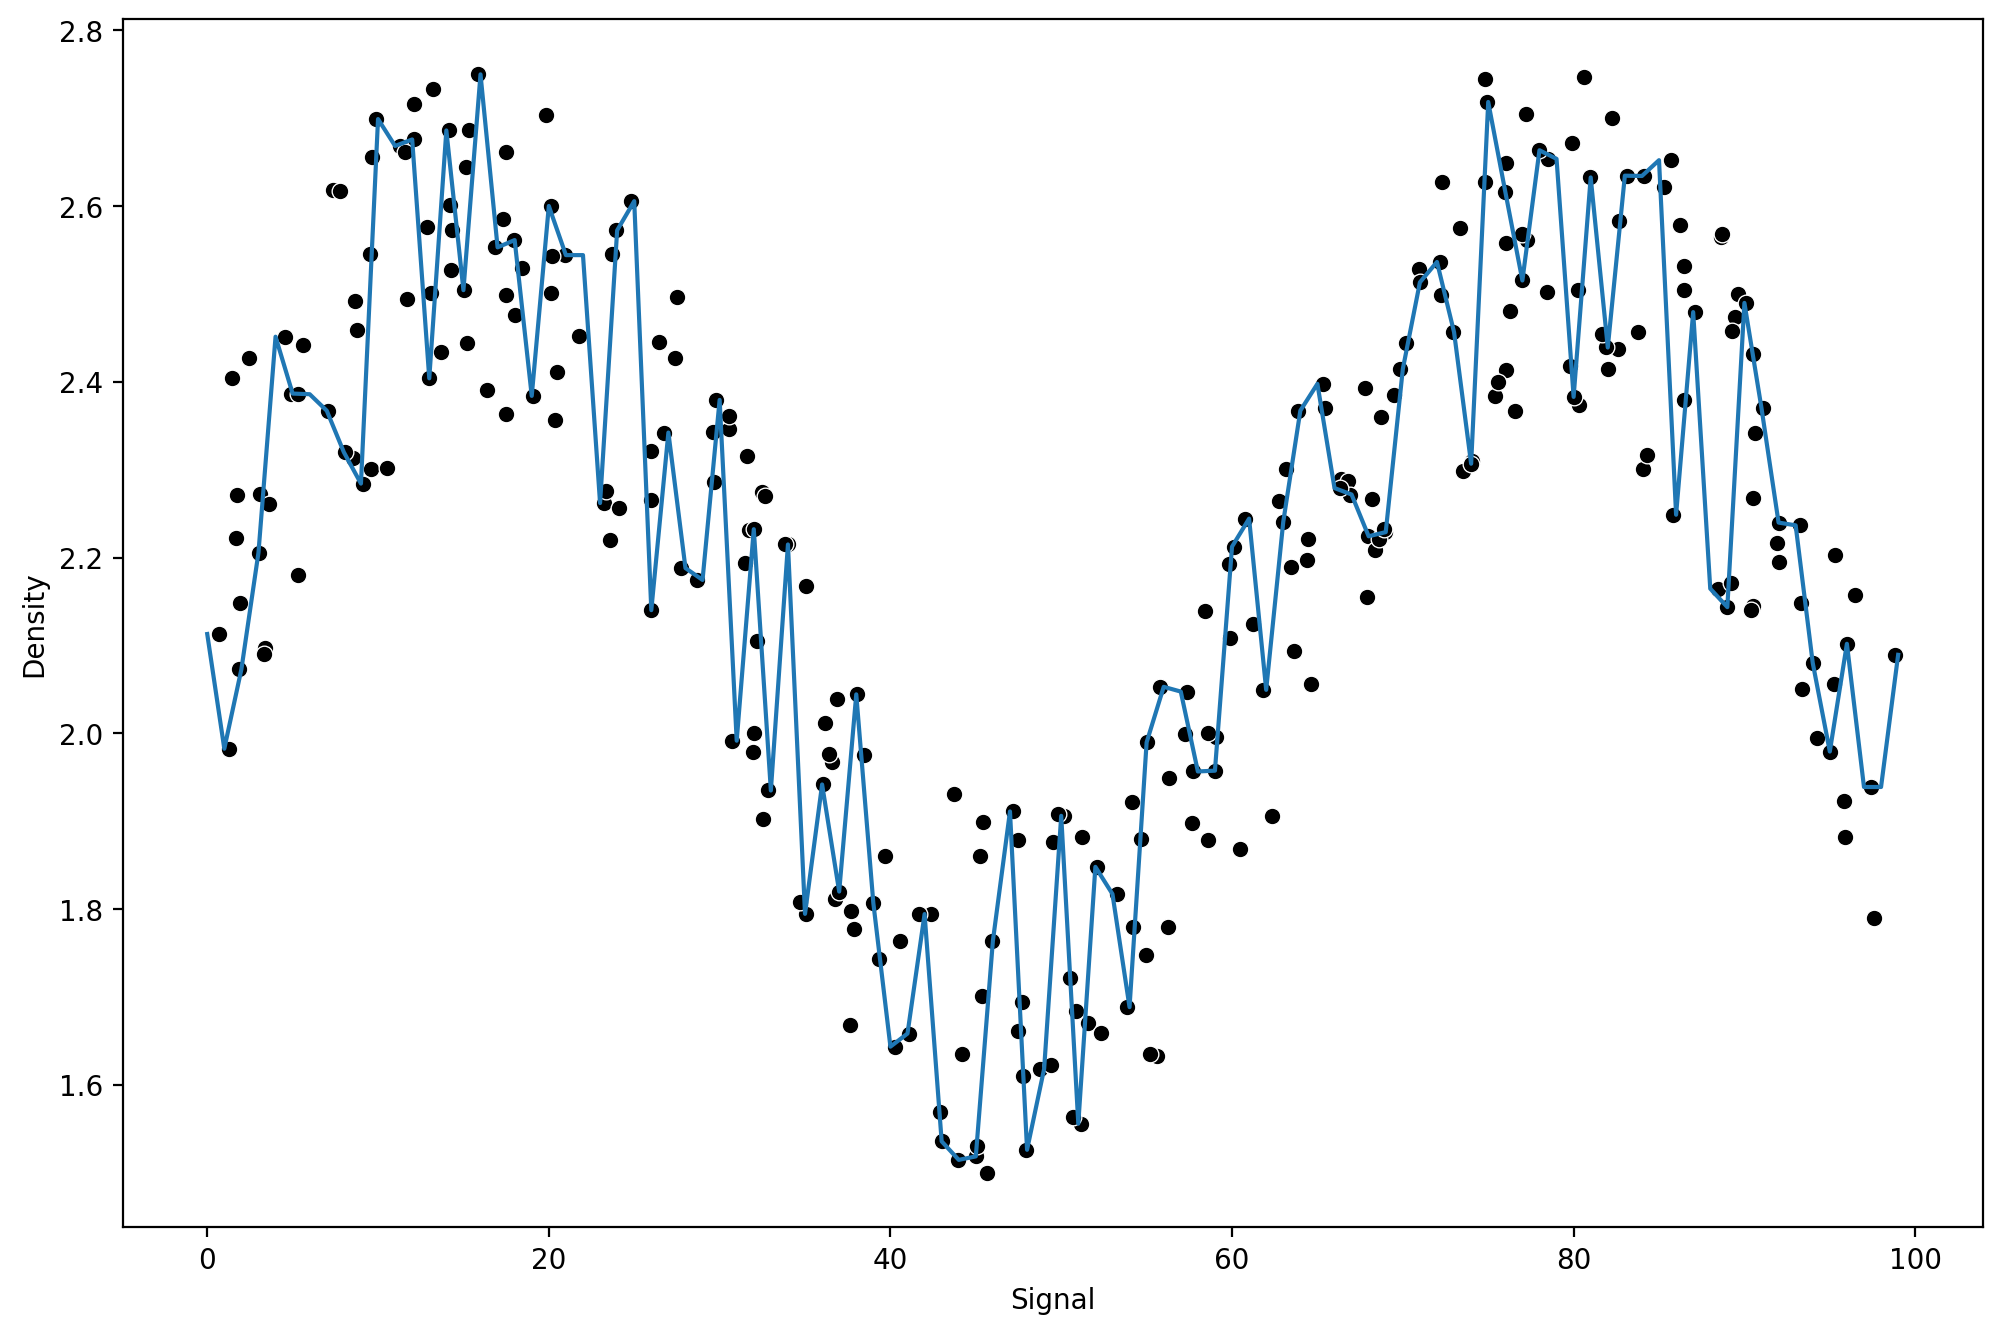

In [104]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## SupportVector Regressor

In [105]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [106]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

MAE : 0.10854210121342305
MSE : 0.12646999302043452


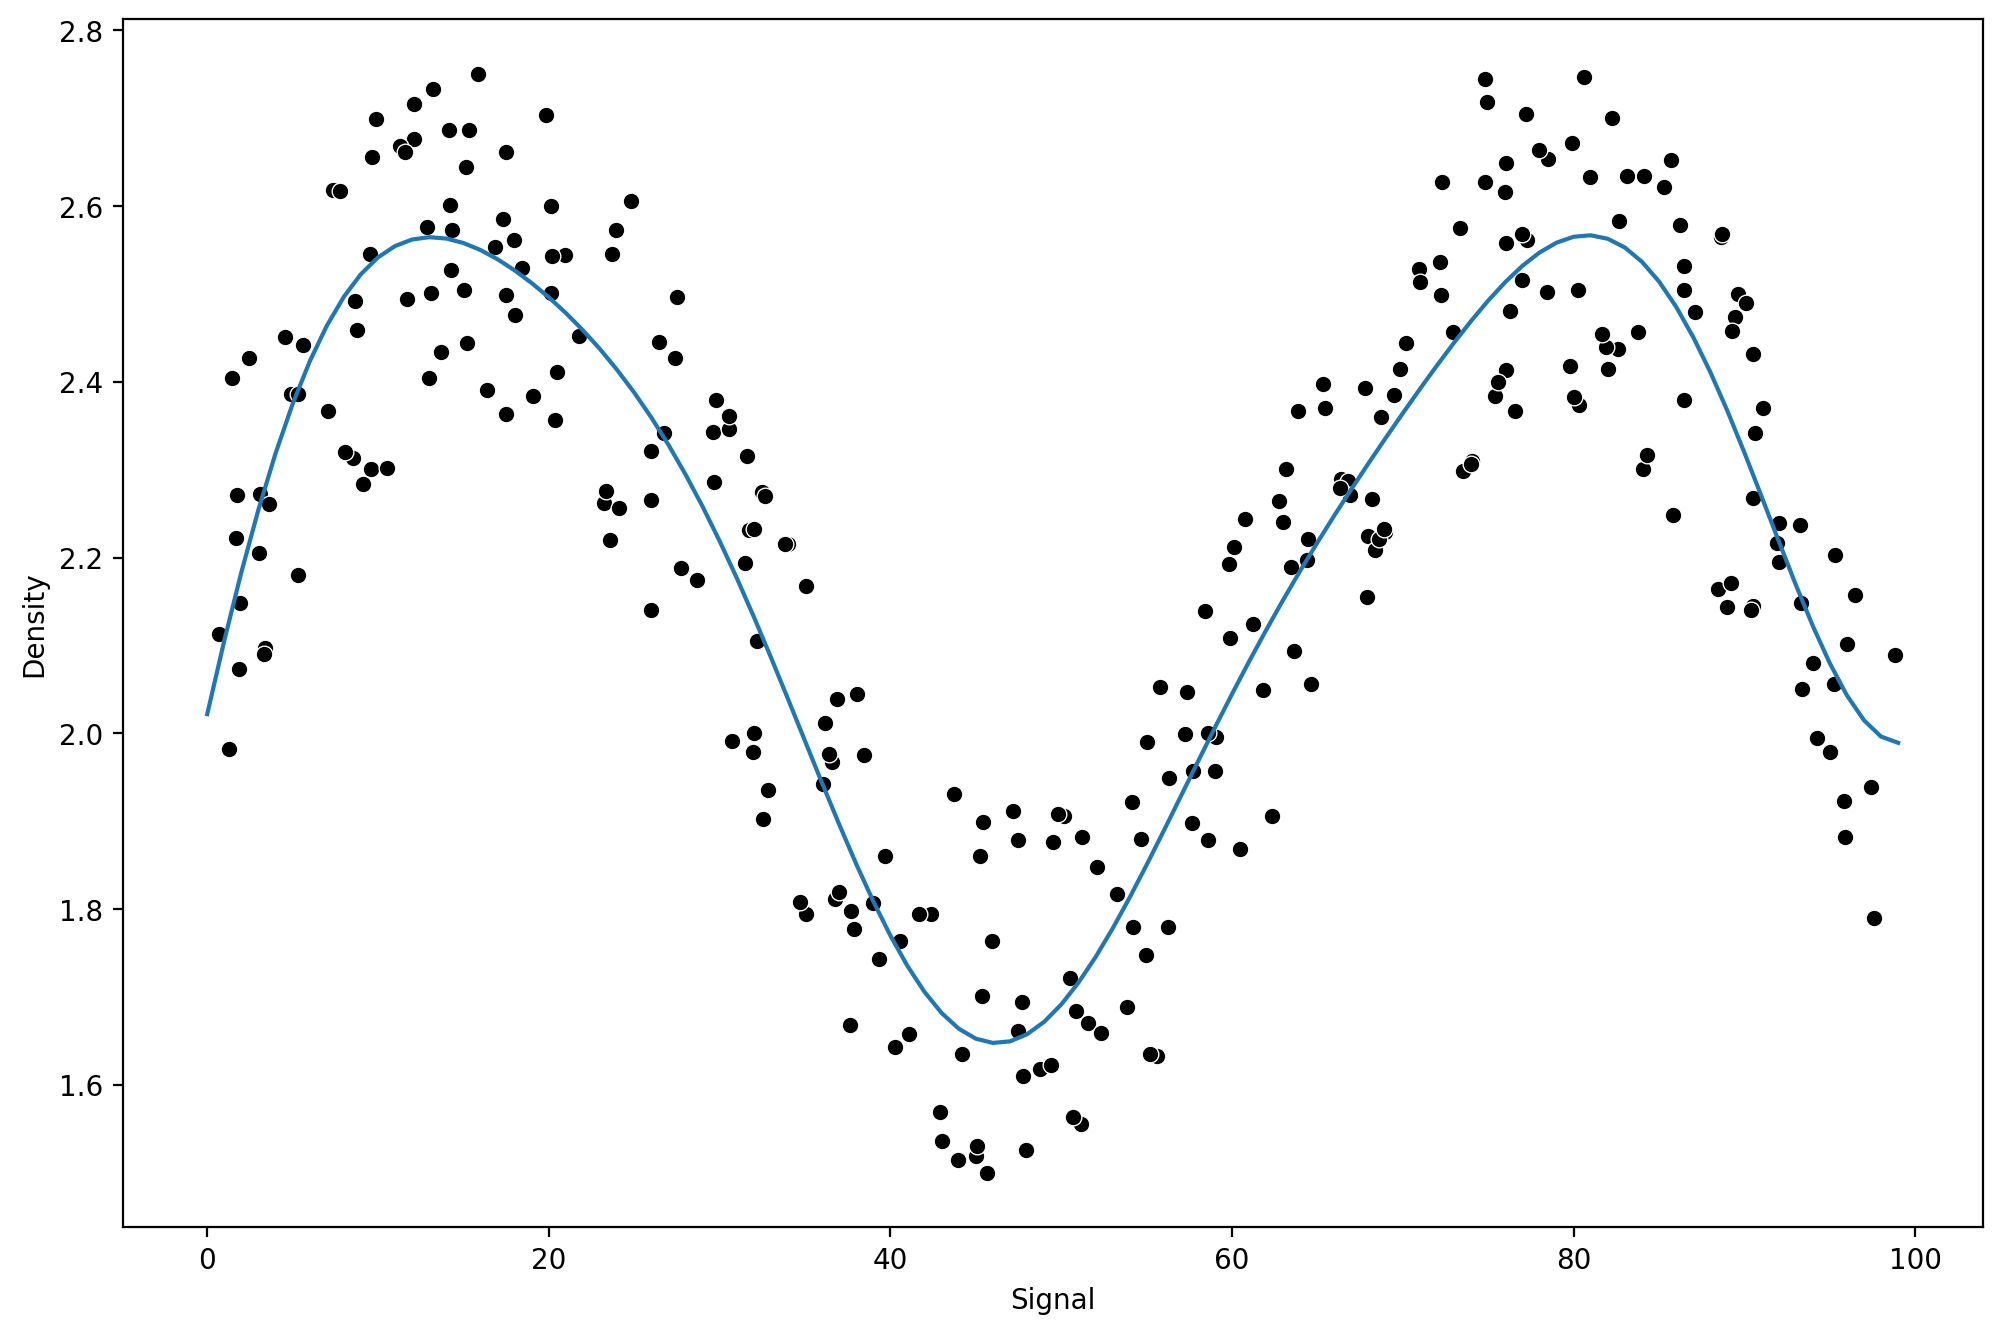

In [107]:
run_model(grid,X_train,y_train,X_test,y_test)

## RandomForest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor

MAE : 0.11540048727664005
MSE : 0.14051377022819742


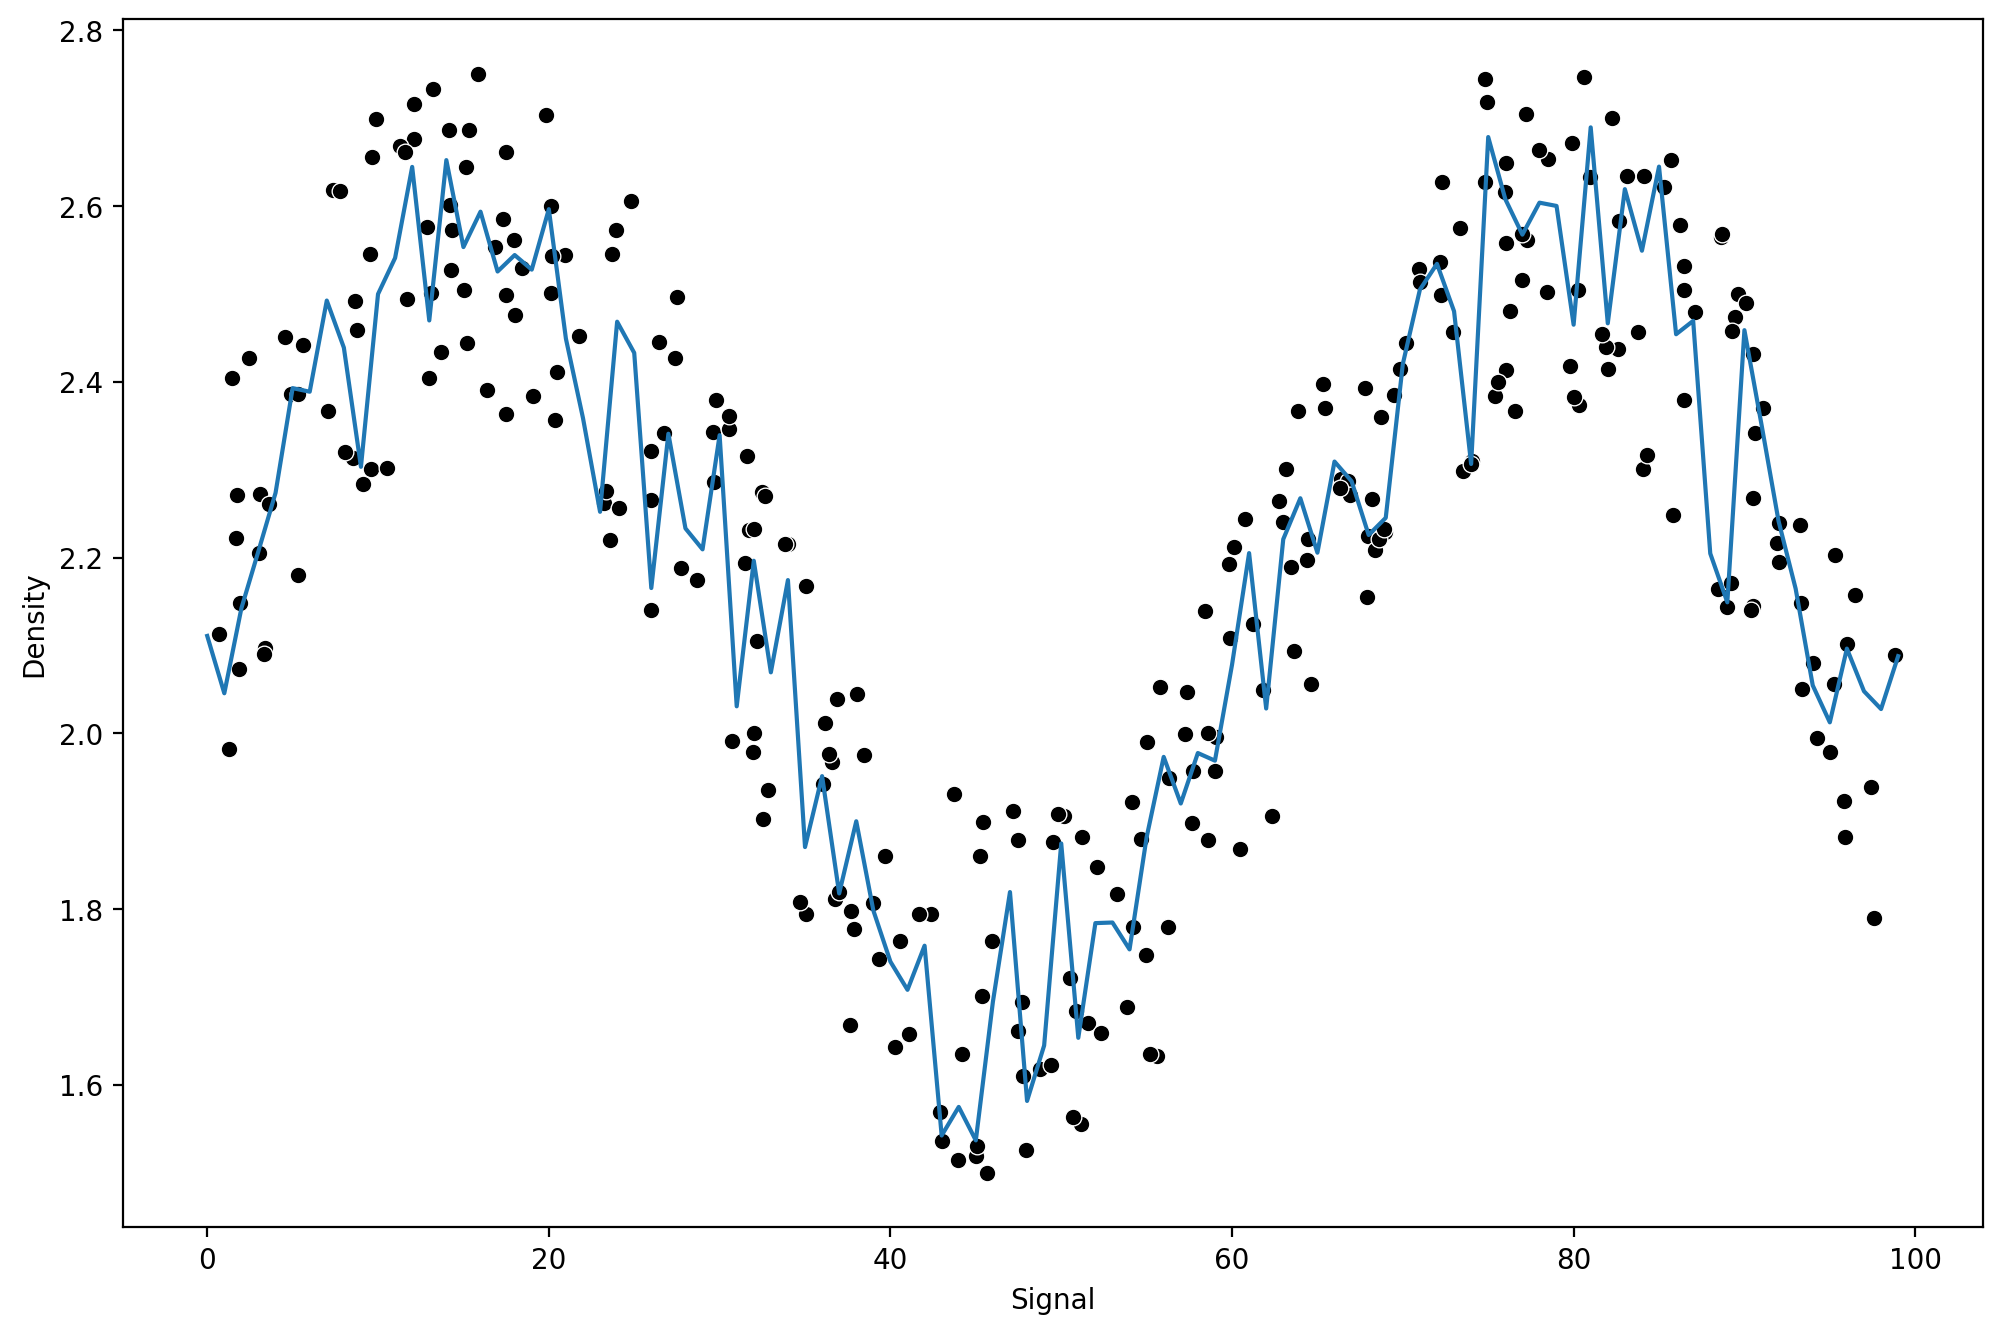

In [109]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr,X_train,y_train,X_test,y_test)

In [110]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [111]:
model = GradientBoostingRegressor()

MAE : 0.11318284854800689
MSE : 0.13294148649584667


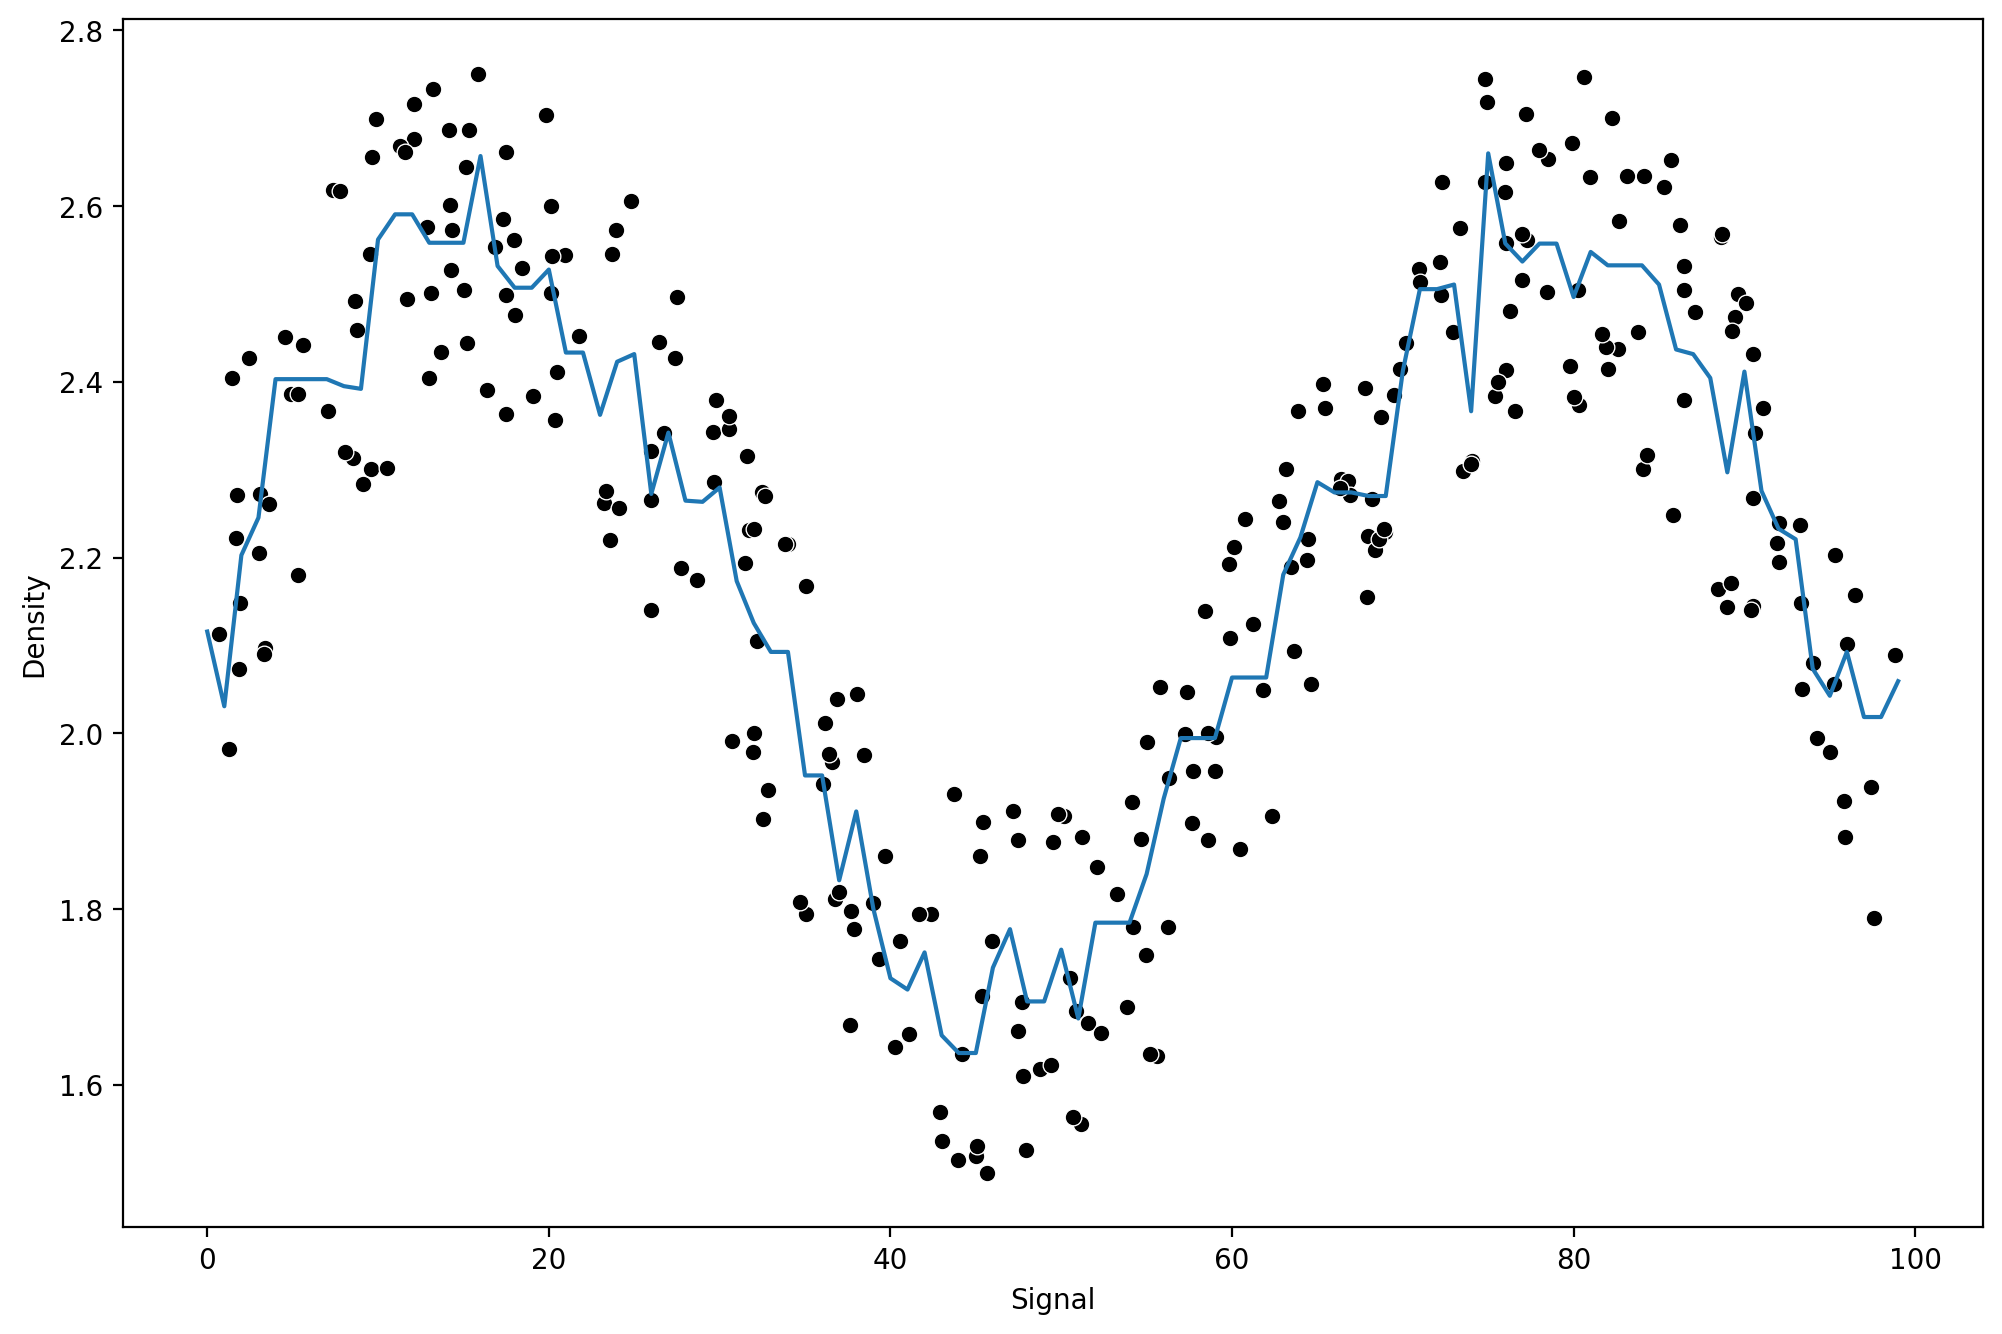

In [112]:
run_model(model,X_train,y_train,X_test,y_test)

In [113]:
model_1 = AdaBoostRegressor()

MAE : 0.11723171817723194
MSE : 0.137365287245953


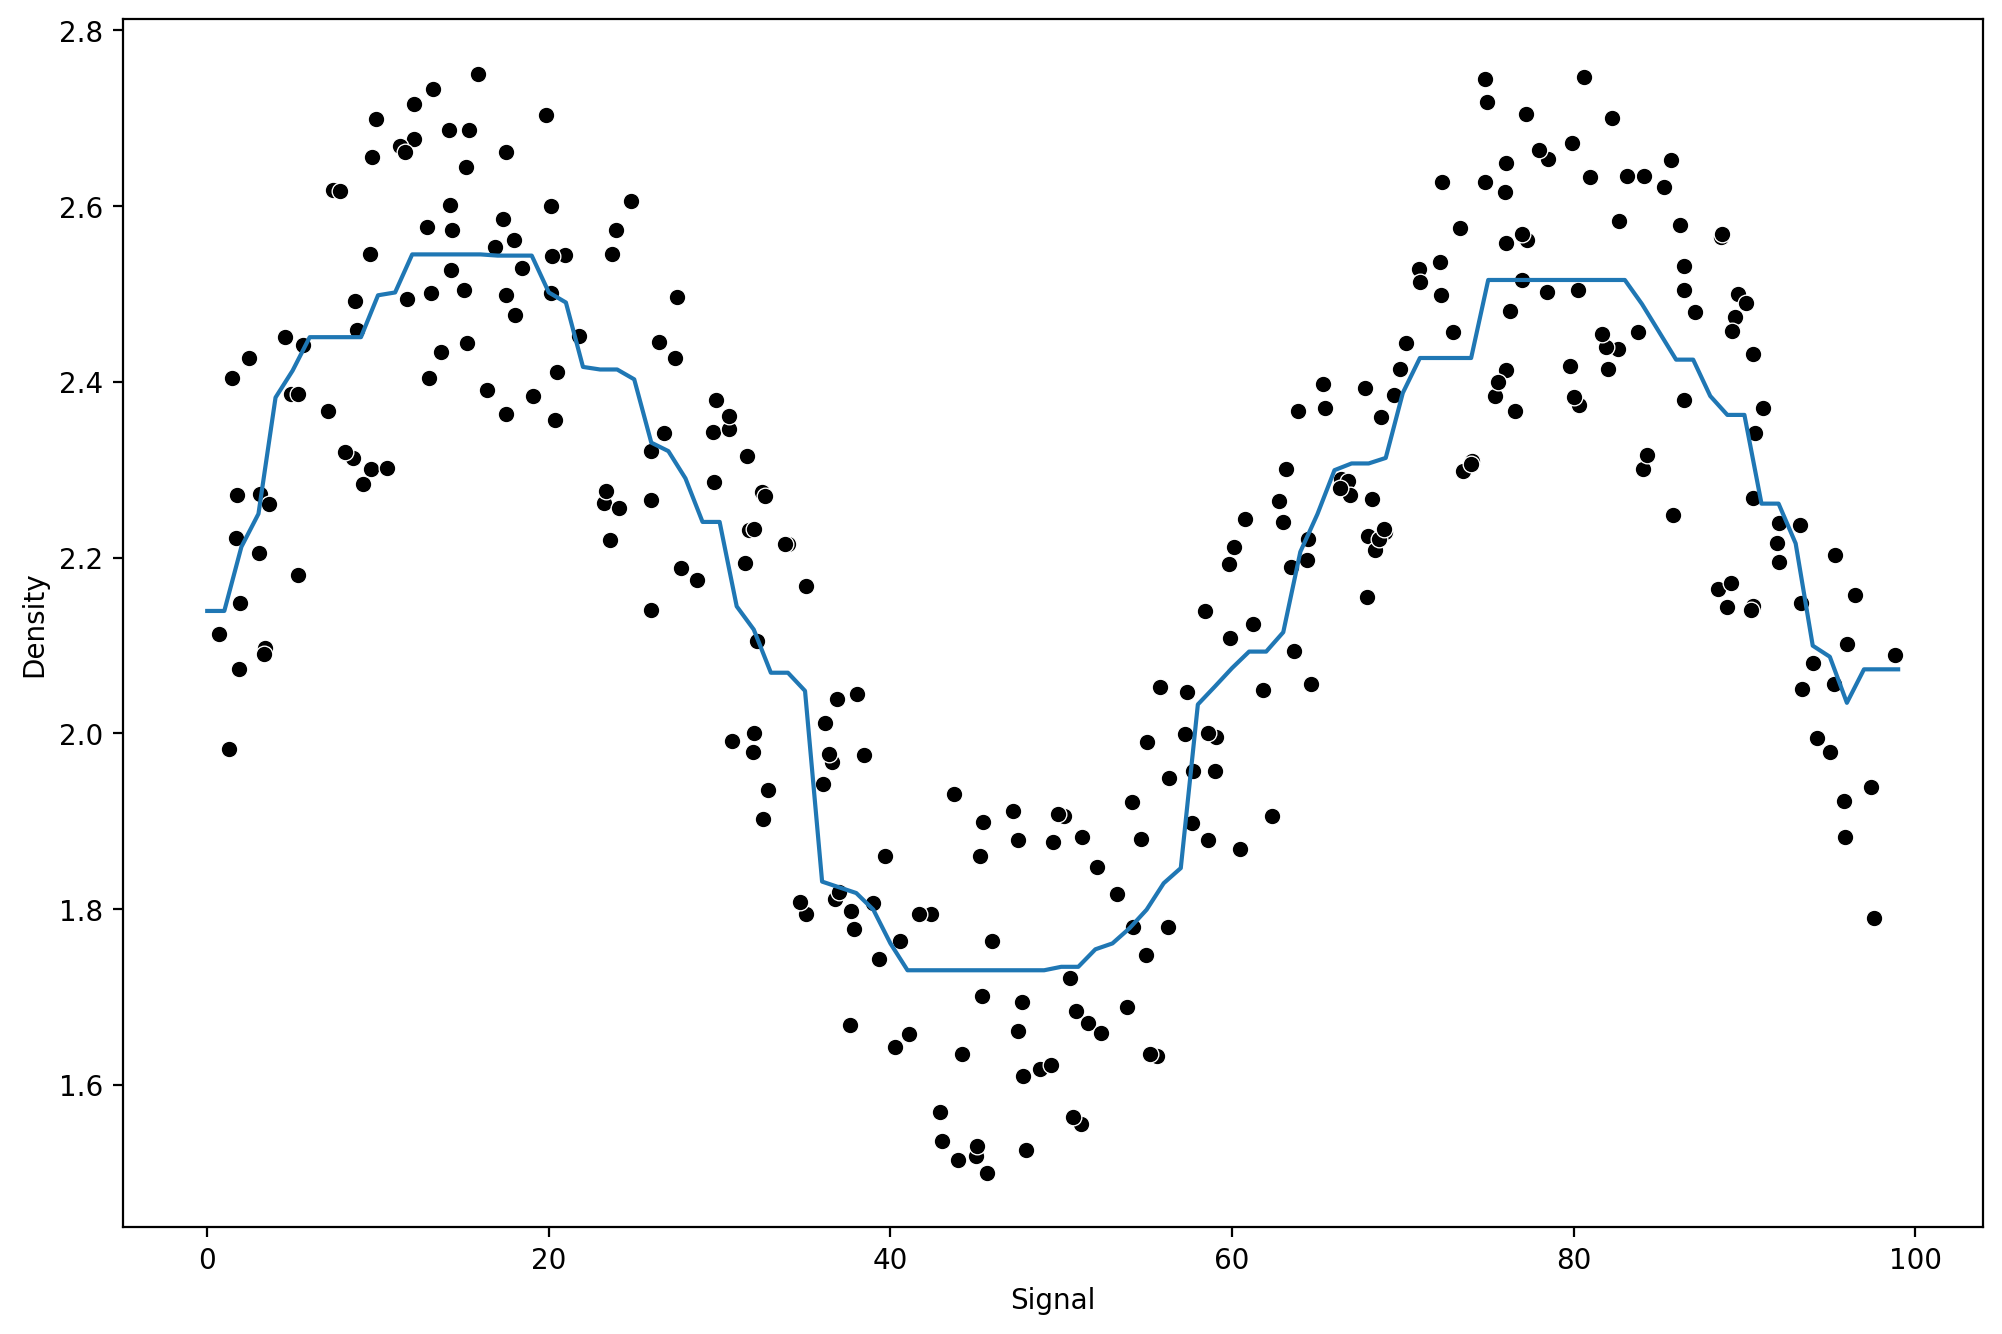

In [114]:
run_model(model_1,X_train,y_train,X_test,y_test)